### Figure Za

In [1]:
def zipf_1949_theoretical(n, scale, **kwargs):
    '''
    11 March 2020
    generates and returns a scaled list of Zipf (1949) distribution rank-
    frequency pairs of length n, e.g., zipf_distrib(4, 1000) returns:
    [(1, 1000), (2, 500), (3, 333), (4, 250)]
    '''
    x_values = [x for x in range(1, n + 1)]
    if 'slope' in kwargs:
        slope = kwargs['slope']
        y_values = [round((1 / pow(x, -slope)) * scale) for x in x_values]
    else:
        y_values = [round((1 / x) * scale) for x in x_values]
    rank_frequency_pairs = list(zip(x_values, y_values))
    return rank_frequency_pairs

In [2]:
import matplotlib.pyplot as pp

def plot_data_bar(data_points):
    x_values, y_values = zip(*data_points)
    pp.bar(x_values, y_values)
    pp.ylabel('frequency')

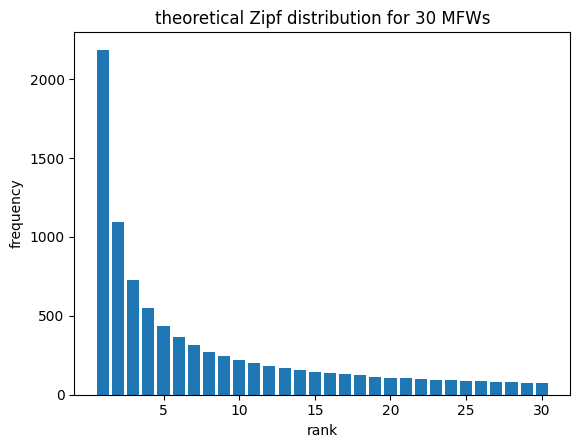

In [3]:
scale = 2187
theoretical = zipf_1949_theoretical(30, scale)
# pp.figure(figsize=(12, 8)) # Jupyter
pp.figure(figsize=(6.4, 4.8), dpi=100) # print
plot_data_bar(theoretical)
pp.xlabel('rank')
pp.title(f'theoretical Zipf distribution for {len(theoretical)} MFWs')
pp.xticks([(x + 1) * 5 for x in range(len(theoretical) // 5)])
# pp.savefig('./PNGs/Figure_Za')
pp.show()
pp.close()

### Figure Zb

In [4]:
def plot_data_scatter(data_points):
    x_values, y_values = zip(*data_points)
    pp.scatter(x_values, y_values)
    pp.xlabel('$log_{e}$ rank')
    pp.ylabel('$log_{e}$ frequency')

In [5]:
import math

def logify(data_points):
    x_tmp, y_tmp = zip(*data_points)
    x_values = list(x_tmp)
    y_values = list(y_tmp)
    x_log = [math.log(x) for x in x_values]
    y_log = [math.log(y) for y in y_values]
    return list(zip(x_log, y_log))

In [6]:
import statistics

def regression_slope(data_points):
    n = len(data_points)
    x_values, y_values = zip(*data_points)
    x_bar = statistics.mean(x_values)
    y_bar = statistics.mean(y_values)
    xy_sum = 0
    x_squared_sum = 0
    for i in range(n):
        xy_sum += x_values[i] * y_values[i]
        x_squared_sum += x_values[i] ** 2
    return (xy_sum - n * x_bar * y_bar) / (x_squared_sum - n * x_bar ** 2)

In [7]:
def plot_regression(data_points):
    x_values, y_values = zip(*data_points)
    x_bar = statistics.mean(x_values)
    y_bar = statistics.mean(y_values)
    slope = regression_slope(data_points)
    x_values = [0, max(x_values)]
    y_values = []
    for x in x_values:
        y_values.append(y_bar + slope * (x - x_bar))
    pp.plot(x_values, y_values)
    return slope

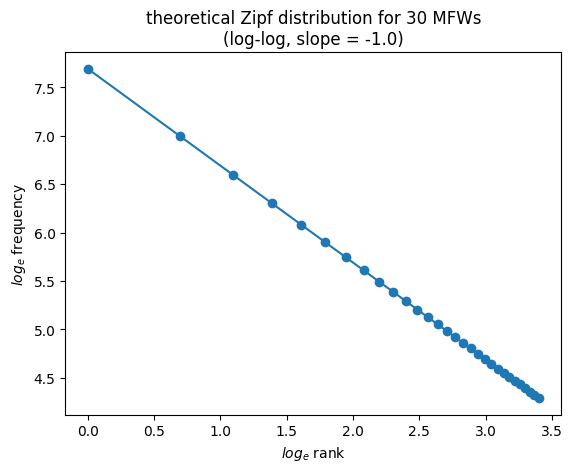

In [8]:
n = len(theoretical)
# pp.figure(figsize=(12, 8)) # Jupyter
pp.figure(figsize=(6.4, 4.8), dpi=100) # print
plot_data_scatter(logify(theoretical[0:n]))
slope = plot_regression(logify(theoretical[0:n]))
pp.title(f'theoretical Zipf distribution for {n} MFWs\n(log-log, slope = {slope:.1f})')
# pp.savefig('./PNGs/Figure_Zb')
pp.show()
pp.close()

### Figure Zc

In [9]:
import re

def get_tokens(filename):
    '''open text file and return list of tokens'''
    # text = open(filename, 'r').read().lower()
    f = open(filename, 'r') # open file
    text = f.read() # read file
    text = text.lower() # lower-case text
    tokens = [word for word in re.split('\W', text) if word != ''] # remove punctuation
    return tokens

In [10]:
def get_features(samples):
    tokens = []
    for sample in samples:
        tokens += get_tokens('../corpus/' + sample + '.txt')
    types = list(set(tokens)) # create unordered list of unique words
    tmp = dict.fromkeys(types, 0) # create temporary dictionary, initialize counts to 0
    for token in tokens: tmp[token] += 1 # count words
    # re-order words in temporary dictionary numerically by descending frequency
    # re-order words with same frequency alphabetically
    features = { 
        key: value for key, value in sorted(tmp.items(),
        key = lambda item: (-item[1], item[0]))
    }
    return features

In [11]:
def zipf_1949_actual(features):
    '''convert dictionary of features to list of rank-frequency pairs'''
    frequencies = list(features.values())
    rank_frequency_pairs = []
    for rank in range(0, len(features)):
        rank_frequency_pairs.append((rank + 1, frequencies[rank]))
    return rank_frequency_pairs

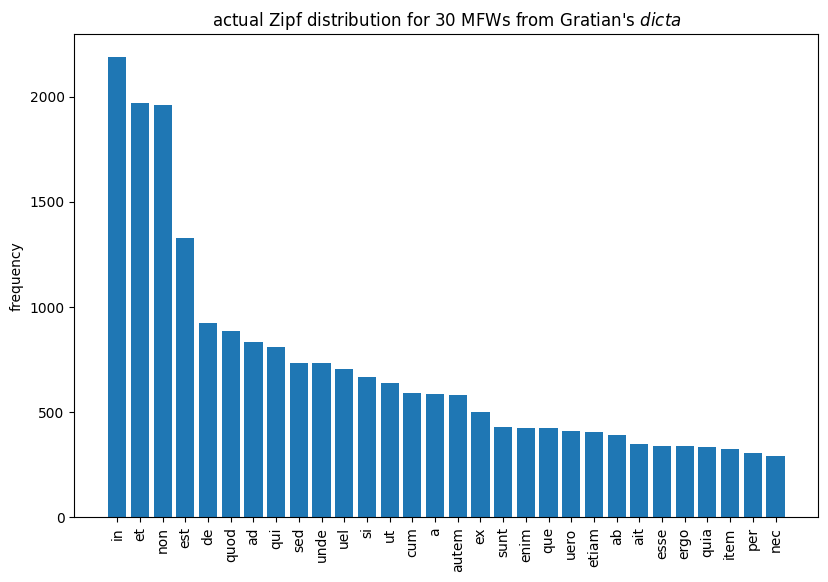

In [12]:
import itertools

samples = ['Gratian0', 'Gratian1', 'dePen', 'Gratian2']
features = get_features(samples)
actual = zipf_1949_actual(features)
# pp.figure(figsize=(12, 8)) # Jupyter
pp.figure(figsize=[9.6, 6.4], dpi=100) # print
plot_data_bar(actual[:30])
ranks = [rank for rank, frequency in actual[:30]]
words = list(dict(itertools.islice(get_features(samples).items(), 30)))
pp.xticks(ranks, words, rotation='vertical')
pp.title(f"actual Zipf distribution for 30 MFWs from Gratian's " + '$\it{dicta}$')
# pp.savefig('./PNGs/Figure_Zc')
pp.show()
pp.close()

### Figure Zd

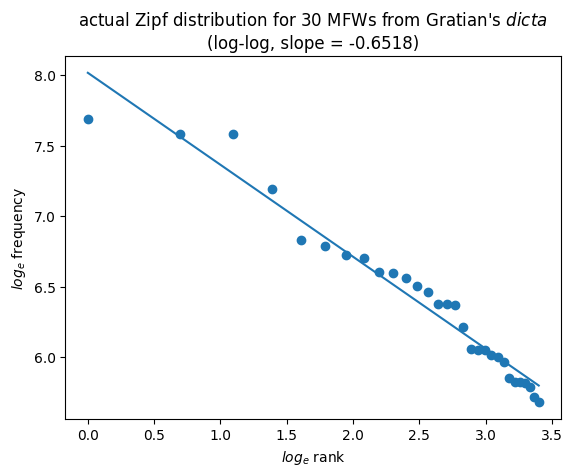

In [13]:
# pp.figure(figsize=(12, 8)) # Jupyter
pp.figure(figsize=(6.4, 4.8), dpi=100) # print
plot_data_scatter(logify(actual[:30]))
slope = plot_regression(logify(actual[:30]))
pp.title(f"actual Zipf distribution for {30} MFWs from Gratian's " + '$\it{dicta}$\n' + f'(log-log, slope = {slope:.4f})')
# pp.savefig('./PNGs/Figure_Zd')
pp.show()
pp.close()

### Figure Ze

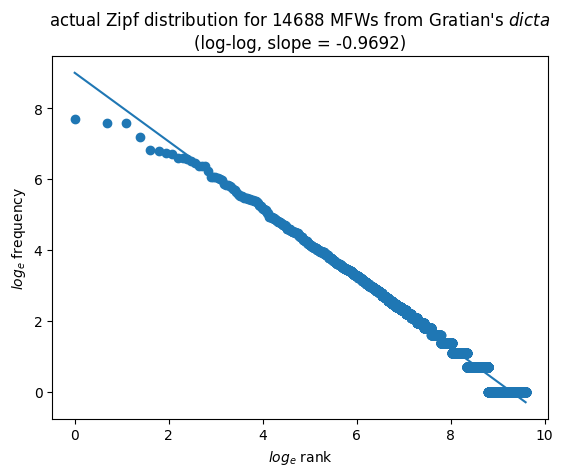

In [14]:
# pp.figure(figsize=(12, 8)) # Jupyter
pp.figure(figsize=(6.4, 4.8), dpi=100) # print
plot_data_scatter(logify(actual))
slope = plot_regression(logify(actual))
pp.title(f"actual Zipf distribution for {len(actual)} MFWs from Gratian's " + '$\it{dicta}$\n' + f'(log-log, slope = {slope:.4f})')
# pp.savefig('./PNGs/Figure_Ze')
pp.show()
pp.close()

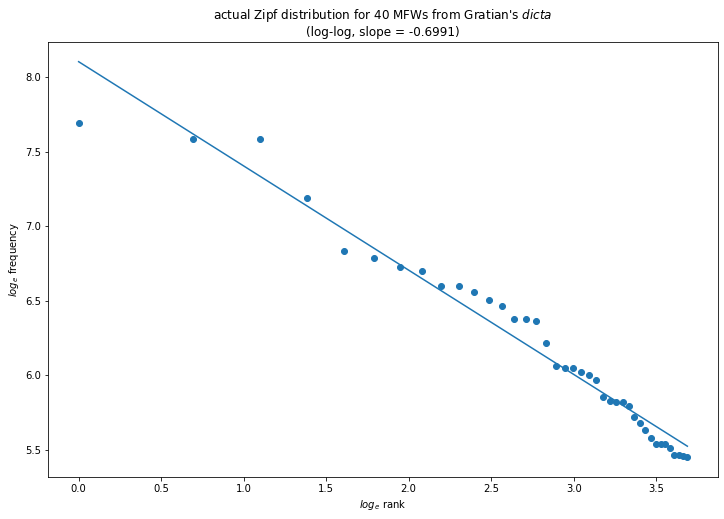

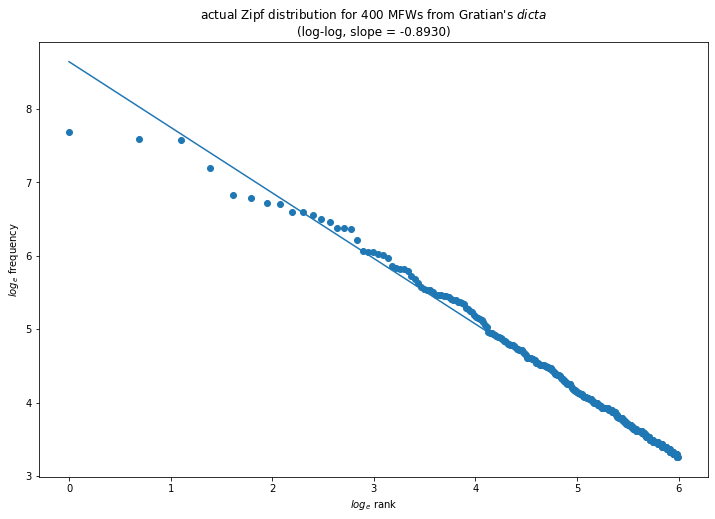

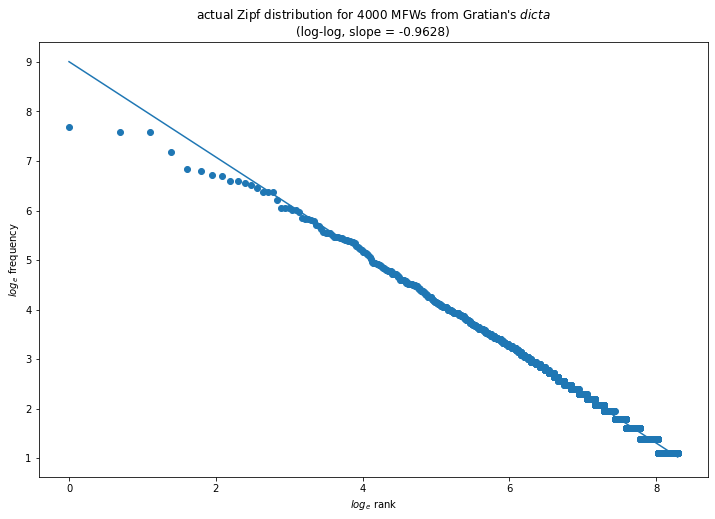

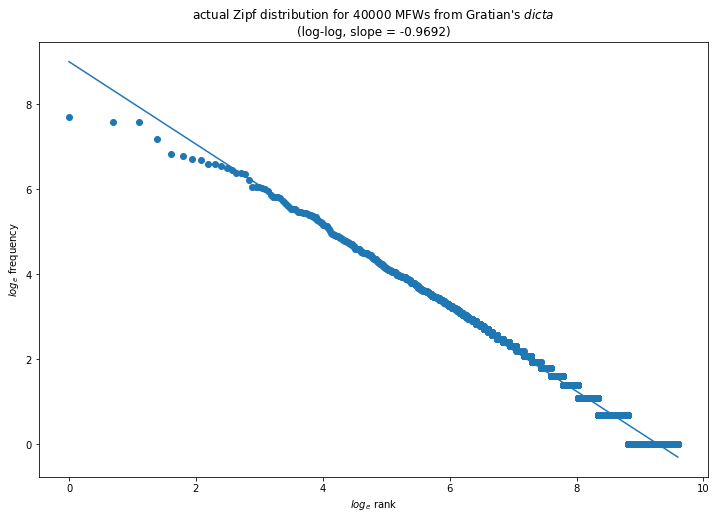

In [15]:
for n in [40, 400, 4000, 40000]:
    pp.figure(figsize=(12, 8)) # Jupyter
    plot_data_scatter(logify(actual[:n]))
    slope = plot_regression(logify(actual[:n]))
    pp.title(f"actual Zipf distribution for {n} MFWs from Gratian's " + '$\it{dicta}$\n' + f'(log-log, slope = {slope:.4f})')
    pp.show()
    pp.close()